In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import re
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import style
from tensorflow.keras.models import Model, load_model
%matplotlib inline

In [3]:
# Input dataset
dataset_url = 'https://raw.githubusercontent.com/adrielgian99/Bangkit-Capstone-C242-PR593/machine_learning/Clean_Dataset/Data_Obesitas_new.csv'

df = pd.read_csv(dataset_url)
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,perempuan,21,162,64.0,iya,tidak,kadang-kadang,tiga kali,kadang-kadang,tidak,kisaran antara 1-2 liter,tidak,tidak ada aktivitas fisik,kisaran antara 3-5 jam,tidak,transportasi umum,Normal_Weight
1,perempuan,21,152,56.0,iya,tidak,selalu,tiga kali,kadang-kadang,iya,lebih dari 2 liter,iya,kisaran 5-6 hari atau lebih,kisaran 0-2 jam,kadang-kadang,transportasi umum,Normal_Weight
2,pria,23,180,77.0,iya,tidak,kadang-kadang,tiga kali,kadang-kadang,tidak,kisaran antara 1-2 liter,tidak,kisaran 3-4 hari,kisaran antara 3-5 jam,sering,transportasi umum,Normal_Weight
3,pria,27,180,87.0,tidak,tidak,selalu,tiga kali,kadang-kadang,tidak,kisaran antara 1-2 liter,tidak,kisaran 3-4 hari,kisaran 0-2 jam,sering,jalan kaki,Overweight_Level_I
4,pria,22,178,89.0,tidak,tidak,kadang-kadang,sekali,kadang-kadang,tidak,kisaran antara 1-2 liter,tidak,tidak ada aktivitas fisik,kisaran 0-2 jam,kadang-kadang,transportasi umum,Overweight_Level_II


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1804 non-null   object 
 1   Age                             1804 non-null   int64  
 2   Height                          1804 non-null   int64  
 3   Weight                          1804 non-null   float64
 4   family_history_with_overweight  1804 non-null   object 
 5   FAVC                            1804 non-null   object 
 6   FCVC                            1804 non-null   object 
 7   NCP                             1804 non-null   object 
 8   CAEC                            1804 non-null   object 
 9   SMOKE                           1804 non-null   object 
 10  CH2O                            1804 non-null   object 
 11  SCC                             1804 non-null   object 
 12  FAF                             18

In [5]:
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())
df.describe()

Jumlah duplikasi:  0


,Age,Height,Weight
count,1804.000000,1804.000000,1804.000000
mean,24.028825,169.916851,84.434035
std,6.572287,9.488222,25.754969
min,14.000000,145.000000,39.000000
25%,19.000000,163.000000,64.000000
50%,22.000000,170.000000,82.000000
75%,26.000000,177.000000,104.000000
max,61.000000,198.000000,173.000000


In [7]:
selected_columns = ['Gender', 'family_history_with_overweight',	'FAVC',	'FCVC',	'NCP',	'CAEC',	'SMOKE',	'CH2O',	'SCC', 'FAF',	'TUE', 'CALC',	'MTRANS',	'NObeyesdad']

for column in selected_columns:
    print(f"Unique value frequencies for column '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Unique value frequencies for column 'Gender':
Gender
pria         942
perempuan    862
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'family_history_with_overweight':
family_history_with_overweight
iya      1457
tidak     347
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'FAVC':
FAVC
iya      1566
tidak     238
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'FCVC':
FCVC
kadang-kadang    1141
selalu            498
jarang            165
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'NCP':
NCP
tiga kali               1135
sekali                   340
dua kali                 264
lebih dari tiga kali      65
Name: count, dtype: int64
----------------------------------------
Unique value frequencies for column 'CAEC':
CAEC
kadang-kadang    1496
sering            223
s

MODEL KLASIFIKASI

In [8]:
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

In [9]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [11]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Check the processed data shapes
{
    "X_train_shape": X_train.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_test_shape": y_test.shape
}

{'X_train_shape': (1443, 43),
 'X_test_shape': (361, 43),
 'y_train_shape': (1443,),
 'y_test_shape': (361,)}

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,343 (56.03 KB)

 Trainable params: 14,343 (56.03 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2474 - loss: 1.8609 - val_accuracy: 0.4671 - val_loss: 1.4757
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5357 - loss: 1.3718 - val_accuracy: 0.6367 - val_loss: 1.0299
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5892 - loss: 1.0374 - val_accuracy: 0.6990 - val_loss: 0.8110
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7024 - loss: 0.8285 - val_accuracy: 0.7509 - val_loss: 0.6848
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7611 - loss: 0.6891 - val_accuracy: 0.8166 - val_loss: 0.5879
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7685 - loss: 0.6432 - val_accuracy: 0.8028 - val_loss: 0.5333
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7971 - loss: 0.5690 - val_accuracy: 0.8754 - val_loss: 0.4479
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8233 - loss: 0.5230 - val_accuracy: 0.8754 - val_loss:

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0.1504 
Test accuracy: 0.94


In [19]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [20]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)

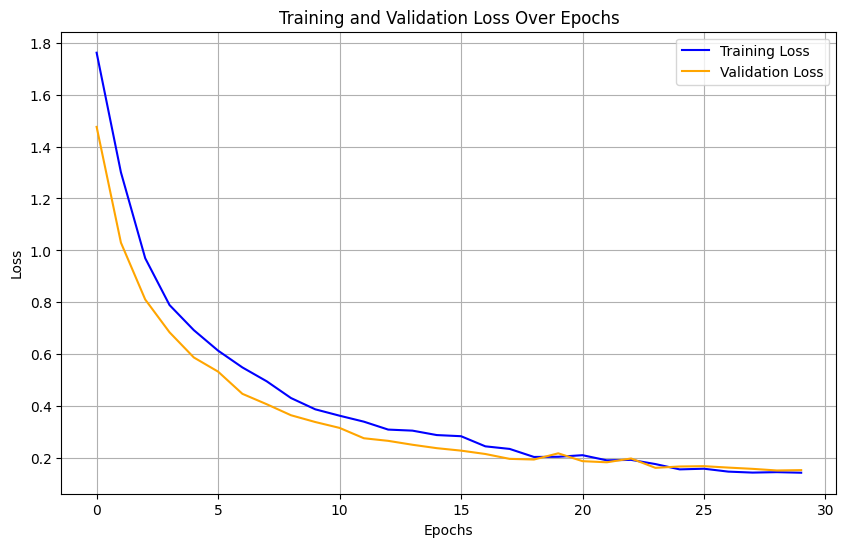

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

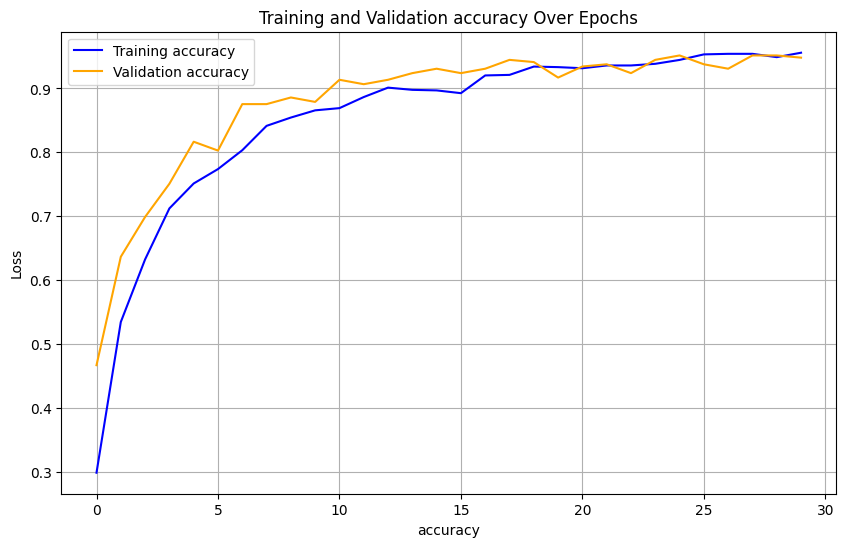

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='orange')
plt.xlabel('accuracy')
plt.ylabel('Loss')
plt.title('Training and Validation accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

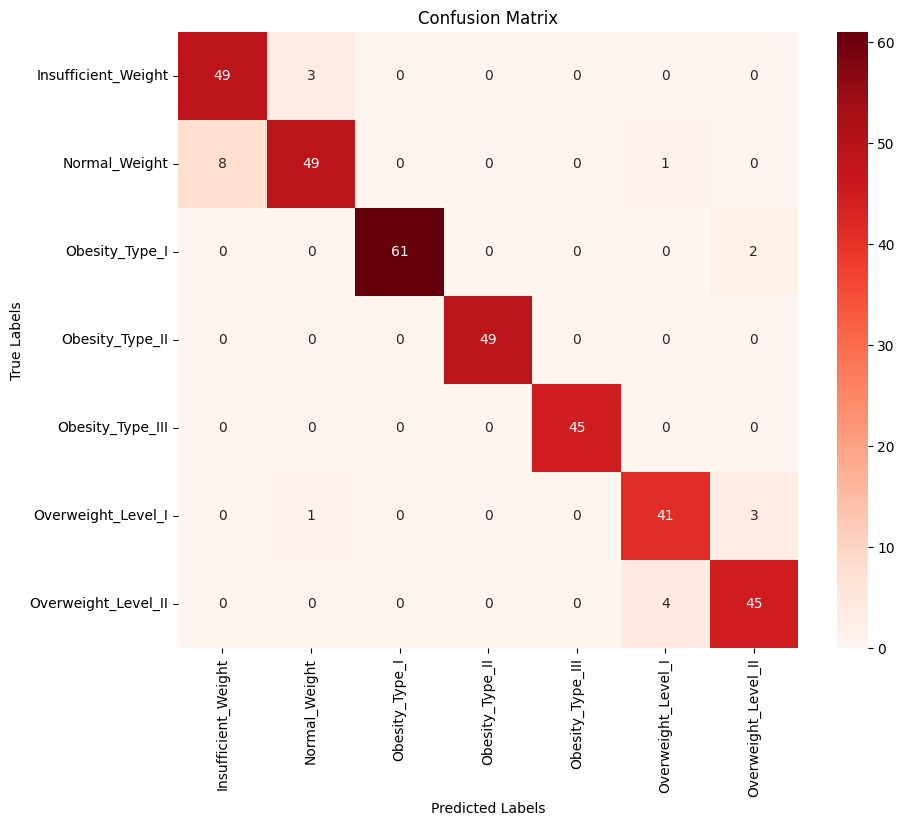

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

In [25]:
true_labels = label_encoder.inverse_transform(y_test)
predicted_labels = label_encoder.inverse_transform(y_pred_classes)

In [26]:
results = pd.DataFrame({
    'Actual': true_labels,
    'Predicted': predicted_labels
})

In [27]:
print("Hasil Prediksi dalam Bentuk Kata:\n")
print(results.head(10))

Hasil Prediksi dalam Bentuk Kata:

                Actual            Predicted
0       Obesity_Type_I       Obesity_Type_I
1   Overweight_Level_I   Overweight_Level_I
2   Overweight_Level_I   Overweight_Level_I
3  Overweight_Level_II  Overweight_Level_II
4       Obesity_Type_I       Obesity_Type_I
5   Overweight_Level_I   Overweight_Level_I
6        Normal_Weight        Normal_Weight
7     Obesity_Type_III     Obesity_Type_III
8  Insufficient_Weight  Insufficient_Weight
9  Insufficient_Weight  Insufficient_Weight


In [28]:
print("\nClassification Report:\n")
print(classification_report(true_labels, predicted_labels))


Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.94      0.90        52
      Normal_Weight       0.92      0.84      0.88        58
     Obesity_Type_I       1.00      0.97      0.98        63
    Obesity_Type_II       1.00      1.00      1.00        49
   Obesity_Type_III       1.00      1.00      1.00        45
 Overweight_Level_I       0.89      0.91      0.90        45
Overweight_Level_II       0.90      0.92      0.91        49

           accuracy                           0.94       361
          macro avg       0.94      0.94      0.94       361
       weighted avg       0.94      0.94      0.94       361



Mengubah Model Ke TFLite

In [29]:
model.save("model.h5")

In [31]:
# Install tensorflowjs

!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [1]:
# mengubah model.h5 kedalam bentuk json
!tensorflowjs_converter --input_format=keras \
model.h5 \
./tfjs_model

2024-12-11 16:55:58.766095: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733936158.816979    2527 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733936158.827990    2527 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 16:55:58.884989: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed

In [30]:
# Load the trained model
model = load_model('model.h5')

# Example new data for prediction
new_data = pd.DataFrame({
    'Gender' : ['pria'],
    'Age': [22],
    'Height' : [170],
    'Weight' : [95.0],
    'family_history_with_overweight' : ['iya'],
    'FAVC' : ['iya'],
    'FCVC' : ['kadang-kadang'],
    'NCP' : ['tiga kali'],
    'CAEC' : ['kadang-kadang'],
    'SMOKE' : ['tidak'],
    'CH2O' : ['lebih dari 2 liter'],
    'SCC' : ['tidak'],
    'FAF' : ['kisaran 1-2 hari'],
    'TUE' :	['lebih dari 5 jam'],
    'CALC' : ['tidak'],
    'MTRANS' : ['mobil']
})

X_new = preprocessor.transform(new_data)

predictions = model.predict(X_new)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels)

print("Predicted Labels:", predicted_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Labels: ['Obesity_Type_I']
